# 4장 데이터 전처리

## 2. 이상치

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
import numpy as np
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'class_0',1:'class_1',2:'class_2'})

### 이상치 찾기

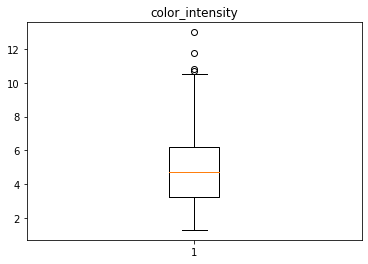

In [2]:
plt.boxplot(wine['color_intensity'], whis=1.5)
plt.title('color_intensity')
plt.show()

In [3]:
def outliers_iqr(dt, col):
    quartile_1, quartile_3 = np.percentile(dt[col],[25,75])
    iqr = quartile_3- quartile_1
    lower_whis = quartile_1-(iqr*1.5)
    upper_whis = quartile_3+(iqr*1.5)
    outliers = dt[(dt[col]>upper_whis) | (dt[col]<lower_whis)]
    return outliers[[col]]

In [4]:
outliers = outliers_iqr(wine,'color_intensity')
outliers

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


### 이상치 정제

In [5]:
# 1) 이상치 제거

In [6]:
drop_outliers = wine.drop(index=outliers.index)

print('Original:',wine.shape)
print('Drop_outliers:', drop_outliers.shape)

Original: (178, 14)
Drop_outliers: (174, 14)


In [7]:
# 2) 이상치 대체

In [8]:
# 이상치를 NAN으로 변경
wine.loc[outliers.index,'color_intensity']= np.NaN

# NAN이 된 이상치를 평균값으로 변경

wine['color_intensity']= wine['color_intensity'].fillna(wine['color_intensity'].mean())
wine.loc[outliers.index,'color_intensity']

151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64

## 3. 범주형 변수 처리

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa',1:'Versicolour',2:'Virginica'})

In [10]:
iris_dummy = pd.get_dummies(iris, columns=['Class'])
iris_dummy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class_Setosa,Class_Versicolour,Class_Virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


## 4. 데이터 분할

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'],test_size=0.2,random_state=1004)
print('X_train: ', X_train.shape, 'X_test: ', X_test.shape)
print('y_train: ', y_train.shape, 'y_test: ', y_test.shape)


X_train:  (120, 4) X_test:  (30, 4)
y_train:  (120,) y_test:  (30,)


In [12]:
# stratify = y : 임의추출로인한 train과 test 셋의 데이터 분포의 차이를 방지하는 층화추출기법

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'],test_size=0.2,random_state=1004,stratify=iris['Class'])
print('X_train: ', X_train.shape, 'X_test: ', X_test.shape)
print('y_train: ', y_train.shape, 'y_test: ', y_test.shape)

X_train:  (120, 4) X_test:  (30, 4)
y_train:  (120,) y_test:  (30,)


In [14]:
y_train.value_counts()

Versicolour    40
Virginica      40
Setosa         40
Name: Class, dtype: int64

In [15]:
iris['Class'].value_counts()

Setosa         50
Versicolour    50
Virginica      50
Name: Class, dtype: int64

## 5. 데이터 스케일링

In [23]:
# Standard Scaler # 회귀보다 분류분석에 용이 # 이상치 민감
from sklearn.preprocessing import StandardScaler
StdScaler = StandardScaler()

# Train데이터의 fitting 과 스케일링
StdScaler.fit(X_train)
X_train_sc = StdScaler.transform(X_train)

# test 데이터의 스케일링
X_test_sc = StdScaler.transform(X_test)

# 결과확인

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(), X_train_sc.mean(), X_train_sc.std()))
print("Test_scaled  (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(), X_test_sc.mean(), X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-2.37, 3.04) (0.00, 1.00)
Test_scaled  (-1.76, 2.48) (-0.01, 0.97)


In [24]:
# Min-Max Scaler # 분류분석보다 회귀분석에 용이 # 이상치 민감
from sklearn.preprocessing import MinMaxScaler

MmScaler = MinMaxScaler()

# Train데이터의 fitting 과 스케일링
MmScaler.fit(X_train)
X_train_sc = MmScaler.transform(X_train)

# test 데이터의 스케일링
X_test_sc = MmScaler.transform(X_test)

# 결과확인

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(), X_train_sc.mean(), X_train_sc.std()))
print("Test_scaled  (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(), X_test_sc.mean(), X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.00, 1.00) (0.46, 0.27)
Test_scaled  (0.03, 1.06) (0.45, 0.26)


In [26]:
# Max Abs Scaler # 최대절댓값과 0이 각각 1,0이 되도록 스케일링하는 정규화 방식 # -1~1사이 # 이상치 민감 #회귀분석에 용이
from sklearn.preprocessing import MaxAbsScaler

MaScaler = MaxAbsScaler()

# Train데이터의 fitting 과 스케일링
MaScaler.fit(X_train)
X_train_sc = MaScaler.transform(X_train)

# test 데이터의 스케일링
X_test_sc = MaScaler.transform(X_test)

# 결과확인

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(), X_train_sc.mean(), X_train_sc.std()))
print("Test_scaled  (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(), X_test_sc.mean(), X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.04, 1.00) (0.62, 0.24)
Test_scaled  (0.08, 1.03) (0.62, 0.24)


In [27]:
# Robust Scaler # 중앙값과 사분위 값을 활용 # 이상치에 강함
from sklearn.preprocessing import RobustScaler
RuScaler = RobustScaler()

# Train데이터의 fitting 과 스케일링
RuScaler.fit(X_train)
X_train_sc = RuScaler.transform(X_train)

# test 데이터의 스케일링
X_test_sc = RuScaler.transform(X_test)

# 결과확인

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(), X_train_sc.mean(), X_train_sc.std()))
print("Test_scaled  (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(), X_test_sc.mean(), X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-1.90, 2.67) (-0.02, 0.65)
Test_scaled  (-1.14, 1.90) (-0.02, 0.62)


In [29]:
# 원본 스케일로 변경하기

pd.DataFrame(X_train_sc)

,0,1,2,3
0,0.846154,0.190476,0.157143,0.133333
1,-0.153846,-0.380952,0.157143,0.466667
2,-0.076923,0.000000,-0.042857,-0.066667
3,0.384615,0.761905,0.357143,0.733333
4,-0.615385,0.761905,-0.785714,-0.600000
...,...,...,...,...
115,-0.461538,-0.571429,-0.128571,0.066667
116,0.230769,-0.380952,-0.100000,0.000000
117,0.846154,0.380952,0.385714,0.666667
118,0.307692,0.761905,0.300000,0.666667


In [31]:
X_original = RuScaler.inverse_transform(X_train_sc)
pd.DataFrame(X_original)

,0,1,2,3
0,6.9,3.1,4.9,1.5
1,5.6,2.8,4.9,2.0
2,5.7,3.0,4.2,1.2
3,6.3,3.4,5.6,2.4
4,5.0,3.4,1.6,0.4
...,...,...,...,...
115,5.2,2.7,3.9,1.4
116,6.1,2.8,4.0,1.3
117,6.9,3.2,5.7,2.3
118,6.2,3.4,5.4,2.3


## 6. 차원축소
참고사이트: https://m.blog.naver.com/tjdrud1323/221720259834

In [32]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [34]:
# 수치형 데이터만 추출
x = iris.drop(columns = 'Class')

# 수치형 변수 정규화
x = StandardScaler().fit_transform(x)

pd.DataFrame(x).head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [42]:
#PCA(n_components = int) n_components : 생성할 주성분의 갯수
# singular_values_ : 전체 데이터에서 해당모델(설정된 주성분의 개수)로 설명할 수 있는 분산의 비율
# explained_variance_ratio_ : 전체 데이터에서 각 주성분이 설명할 수 있는 분산의 비율

from sklearn.decomposition import PCA
pca = PCA(n_components =4)
pca_fit = pca.fit(x)

print("고유 값: ", pca.singular_values_)
print("분산 설명력: ", pca.explained_variance_ratio_)

고유 값:  [20.92306556 11.7091661   4.69185798  1.76273239]
분산 설명력:  [0.72962445 0.22850762 0.03668922 0.00517871]


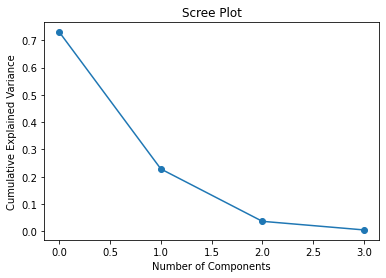

In [46]:
# scree plot 으로 주성분의 개수 정하기

import matplotlib.pyplot as plt

plt.title("Scree Plot")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.plot(pca.explained_variance_ratio_,'o-')
plt.show()

In [50]:
# PCA 객체 생성 (주성분 갯수 2개 생성)
pca = PCA(n_components =2)
# 2개의 주성분을 가지 데이터로 변환
principalComponents = pca.fit_transform(x)
principal_iris= pd.DataFrame(data = principalComponents, columns = ['pca_1','pca_2'])
principal_iris.head()

print("고유 값: ", pca.singular_values_)
print("분산 설명력: ", pca.explained_variance_ratio_)

고유 값:  [20.92306556 11.7091661 ]
분산 설명력:  [0.72962445 0.22850762]


In [52]:
principal_iris

,pca_1,pca_2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


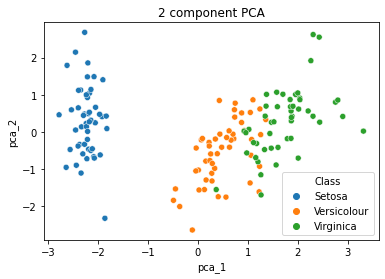

In [53]:
# 주성분 산포도 확인
import seaborn as sns
plt.title('2 component PCA')
sns.scatterplot(x='pca_1',y='pca_2',hue=iris.Class, data=principal_iris)
plt.show()

## 7. 데이터 불균형 문제 처리

In [60]:
# 언더 샘플링
#!pip install imbalanced-learn

In [64]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler


In [65]:
# 불균형 데이터 만들기
x, y = make_classification(n_samples=2000, n_features=6, weights=[0.95], flip_y=0)
print((Counter(y)))

Counter({0: 1900, 1: 100})


In [70]:
# sampling_strategy 파라미터 설정: 'majority'-다수 레이블의 데이터를 샘플링하여 소수 데이터의 수와 동일하게 만듬
#                                  0~1 사이의 숫자 값을 지정- 소수 레이블의 데이터 수와 다수 레이블의 데이터 수가 해당 비율이 되도록 조정
undersample = RandomUnderSampler(sampling_strategy='majority')
x_under, y_under = undersample.fit_resample(x,y)

print(Counter(y_under))

Counter({0: 100, 1: 100})


In [73]:
undersample = RandomUnderSampler(sampling_strategy=0.5)
x_under2, y_under2 = undersample.fit_resample(x,y)

print(Counter(y_under2))

Counter({0: 200, 1: 100})


In [74]:
# 오버 샘플링
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.5)
x_over, y_over = oversample.fit_resample(x,y)
print(Counter(y_over))

Counter({0: 1900, 1: 950})


In [78]:
oversample = RandomOverSampler(sampling_strategy='minority')
x_over2, y_over2 = oversample.fit_resample(x,y)
print(Counter(y_over2))

Counter({0: 1900, 1: 1900})


In [80]:
# SMOTE 오버샘플링 - K개의 최근접이웃을 찾고 관측 값과 이웃값의 사이에 임의의 데이터 생성
from imblearn.over_sampling import SMOTE
smote_sample = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote_sample.fit_resample(x,y)
print(Counter(y_sm))

Counter({0: 1900, 1: 1900})
